# Model Predictive Analytics  - Mohammad Iqbal Jaffar

#### 1. Faktor Apa yang Paling Mempengaruhi Harga Kendaraan Baru (MSRP)?
#### 2. Bagaimana Hubungan Antara Jenis Kendaraan dan Harga (MSRP)?
#### 3. Bagaimana Distribusi Harga Kendaraan Berpengaruh pada Strategi Harga?
#### 4. Bagaimana Kinerja Prediksi Model Dibandingkan dengan Data Aktual?
#### 5. Bagaimana Tren Residual Memberikan Wawasan Tentang Kelompok yang Kurang Terlayani?

## 1. Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle
from math import sqrt
import plotly.express as px

## 2. Load and Preview Dataset

In [2]:
# Load dataset from CSV file
dataset_car = pd.read_csv("/content/dataset_car.csv")

In [3]:
# Display the first few rows of the dataset
dataset_car.head()

,index,Make,Model,Year,Trim,MSRP,Invoice Price,Used/New Price,Body Size,Body Style,Cylinders,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Highway Fuel Economy
0,0,Aston Martin,DBX707,2024,Base,"$242,000",NaN,"$242,000",Large,SUV,V8,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm,20 mpg
1,1,Audi,A3,2024,Premium w/40 TFSI,"$35,800","$33,653","$35,800",Compact,Sedan,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg
2,2,Audi,A3,2024,Premium w/40 TFSI,"$37,800","$35,533","$37,800",Compact,Sedan,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,"$41,400","$38,917","$41,400",Compact,Sedan,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,"$39,400","$37,037","$39,400",Compact,Sedan,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg


In [4]:
# Display dataset summary info (column types, non-null counts)
dataset_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 1610 non-null   int64 
 1   Make                  1610 non-null   object
 2   Model                 1610 non-null   object
 3   Year                  1610 non-null   int64 
 4   Trim                  1610 non-null   object
 5   MSRP                  1610 non-null   object
 6   Invoice Price         1058 non-null   object
 7   Used/New Price        1610 non-null   object
 8   Body Size             1610 non-null   object
 9   Body Style            1610 non-null   object
 10  Cylinders             1445 non-null   object
 11  Engine Aspiration     1610 non-null   object
 12  Drivetrain            1610 non-null   object
 13  Transmission          1610 non-null   object
 14  Horsepower            1605 non-null   object
 15  Torque                1583 non-null   

In [5]:
dataset_car.describe()

,index,Year
count,1610.000000,1610.000000
mean,2932.104969,2023.450932
std,1857.612482,0.497741
min,0.000000,2023.000000
25%,1602.250000,2023.000000
50%,3207.500000,2023.000000
75%,4809.750000,2024.000000
max,6414.000000,2024.000000


## 3. Exploratory Data Analysis (EDA)

In [6]:
# Check unique values for each column to understand the nature of the data
for column in dataset_car:
    unique_vals = np.unique(dataset_car[column].fillna('0'))
    num_unique_vals = len(unique_vals)
    if num_unique_vals <= 12:
        print(f'The number of values for feature {column}: {num_unique_vals} -- {unique_vals}')
    else:
        print(f'The number of values for feature {column}: {num_unique_vals}')

The number of values for feature index: 1610
The number of values for feature Make: 7 -- ['Aston Martin' 'Audi' 'BMW' 'Bentley' 'Ford' 'Mercedes-Benz' 'Nissan']
The number of values for feature Model: 150
The number of values for feature Year: 2 -- [2023 2024]
The number of values for feature Trim: 373
The number of values for feature MSRP: 1317
The number of values for feature Invoice Price: 944
The number of values for feature Used/New Price: 1317
The number of values for feature Body Size: 3 -- ['Compact' 'Large' 'Midsize']
The number of values for feature Body Style: 12 -- ['Cargo Minivan' 'Cargo Van' 'Convertible' 'Convertible SUV' 'Coupe'
 'Hatchback' 'Passenger Minivan' 'Passenger Van' 'Pickup Truck' 'SUV'
 'Sedan' 'Wagon']
The number of values for feature Cylinders: 10 -- ['0' 'I3' 'I4' 'I5' 'I6' 'V10' 'V12' 'V6' 'V8' 'W12']
The number of values for feature Engine Aspiration: 6 -- ['Electric Motor' 'Naturally Aspirated' 'Supercharged' 'Turbocharged'
 'Twin-Turbo' 'Twincharged']

In [7]:
# Check missing values in the dataset
print("Missing Values per Column:")
dataset_car.isnull().sum()

Missing Values per Column:


,0
index,0
Make,0
Model,0
Year,0
Trim,0
MSRP,0
Invoice Price,552
Used/New Price,0
Body Size,0
Body Style,0


## 4. Data Preprocessing

In [8]:
# Drop columns with too many missing values
dataset_car.drop(['Invoice Price', 'Cylinders', 'Highway Fuel Economy'], axis=1, inplace=True)

In [9]:
# Handle missing numeric values by filling with the mean
dataset_car['Horsepower_No'] = dataset_car['Horsepower'].str[:3].astype(float)
dataset_car['Horsepower'].fillna(dataset_car['Horsepower_No'].mean(), inplace=True)

dataset_car['Torque_No'] = dataset_car['Torque'].str[:3].astype(float)
dataset_car['Torque'].fillna(dataset_car['Torque_No'].mean(), inplace=True)

In [10]:
# Verify that missing values have been handled
print("Missing Values after Preprocessing:")
dataset_car.isnull().sum()

Missing Values after Preprocessing:


,0
index,0
Make,0
Model,0
Year,0
Trim,0
MSRP,0
Used/New Price,0
Body Size,0
Body Style,0
Engine Aspiration,0


In [11]:
# Menghapus baris yang memiliki nilai hilang pada kolom tertentu
dataset_car.dropna(subset=['Horsepower_No', 'Torque_No'], inplace=True)

# Verifikasi setelah menghapus nilai hilang
print("Missing Values after Preprocessing:")
dataset_car.isnull().sum()

Missing Values after Preprocessing:


,0
index,0
Make,0
Model,0
Year,0
Trim,0
MSRP,0
Used/New Price,0
Body Size,0
Body Style,0
Engine Aspiration,0


In [12]:
# Clean and convert the MSRP and Used/New Price columns from string to numeric
dataset_car['MSRP'] = dataset_car['MSRP'].replace({'\$': '', ',': ''}, regex=True).astype(float)
dataset_car['Used/New Price'] = dataset_car['Used/New Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

dataset_car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1583 entries, 0 to 1609
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              1583 non-null   int64  
 1   Make               1583 non-null   object 
 2   Model              1583 non-null   object 
 3   Year               1583 non-null   int64  
 4   Trim               1583 non-null   object 
 5   MSRP               1583 non-null   float64
 6   Used/New Price     1583 non-null   float64
 7   Body Size          1583 non-null   object 
 8   Body Style         1583 non-null   object 
 9   Engine Aspiration  1583 non-null   object 
 10  Drivetrain         1583 non-null   object 
 11  Transmission       1583 non-null   object 
 12  Horsepower         1583 non-null   object 
 13  Torque             1583 non-null   object 
 14  Horsepower_No      1583 non-null   float64
 15  Torque_No          1583 non-null   float64
dtypes: float64(4), int64(2), obje

In [13]:
dataset_car.describe()

,index,Year,MSRP,Used/New Price,Horsepower_No,Torque_No
count,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000
mean,2965.954517,2023.443462,72792.433354,72792.433354,346.288692,364.973468
std,1845.724188,0.496950,55276.144432,55276.144432,120.874811,129.603838
min,0.000000,2023.000000,15980.000000,15980.000000,122.000000,103.000000
25%,1619.500000,2023.000000,46512.500000,46512.500000,261.000000,265.000000
50%,3218.000000,2023.000000,55900.000000,55900.000000,318.000000,339.000000
75%,4818.500000,2024.000000,73845.000000,73845.000000,405.000000,445.000000
max,6414.000000,2024.000000,391100.000000,391100.000000,831.000000,811.000000


In [14]:
# Calculate Q1 (25%) and Q3 (75%)
Q1 = dataset_car['MSRP'].quantile(0.25)
Q3 = dataset_car['MSRP'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers based on IQR
dataset_car = dataset_car[(dataset_car['MSRP'] >= lower_bound) & (dataset_car['MSRP'] <= upper_bound)]

# Check the distribution after cleaning
print(dataset_car[['MSRP', 'Used/New Price', 'Horsepower_No', 'Torque_No']].describe())

                MSRP  Used/New Price  Horsepower_No    Torque_No
count    1417.000000     1417.000000    1417.000000  1417.000000
mean    56698.639379    56698.639379     320.038814   341.191249
std     18112.554533    18112.554533      96.234907   112.069229
min     15980.000000    15980.000000     122.000000   105.000000
25%     45265.000000    45265.000000     255.000000   260.000000
50%     54010.000000    54010.000000     300.000000   325.000000
75%     64790.000000    64790.000000     400.000000   413.000000
max    114500.000000   114500.000000     700.000000   811.000000


## 5. Data Visualization

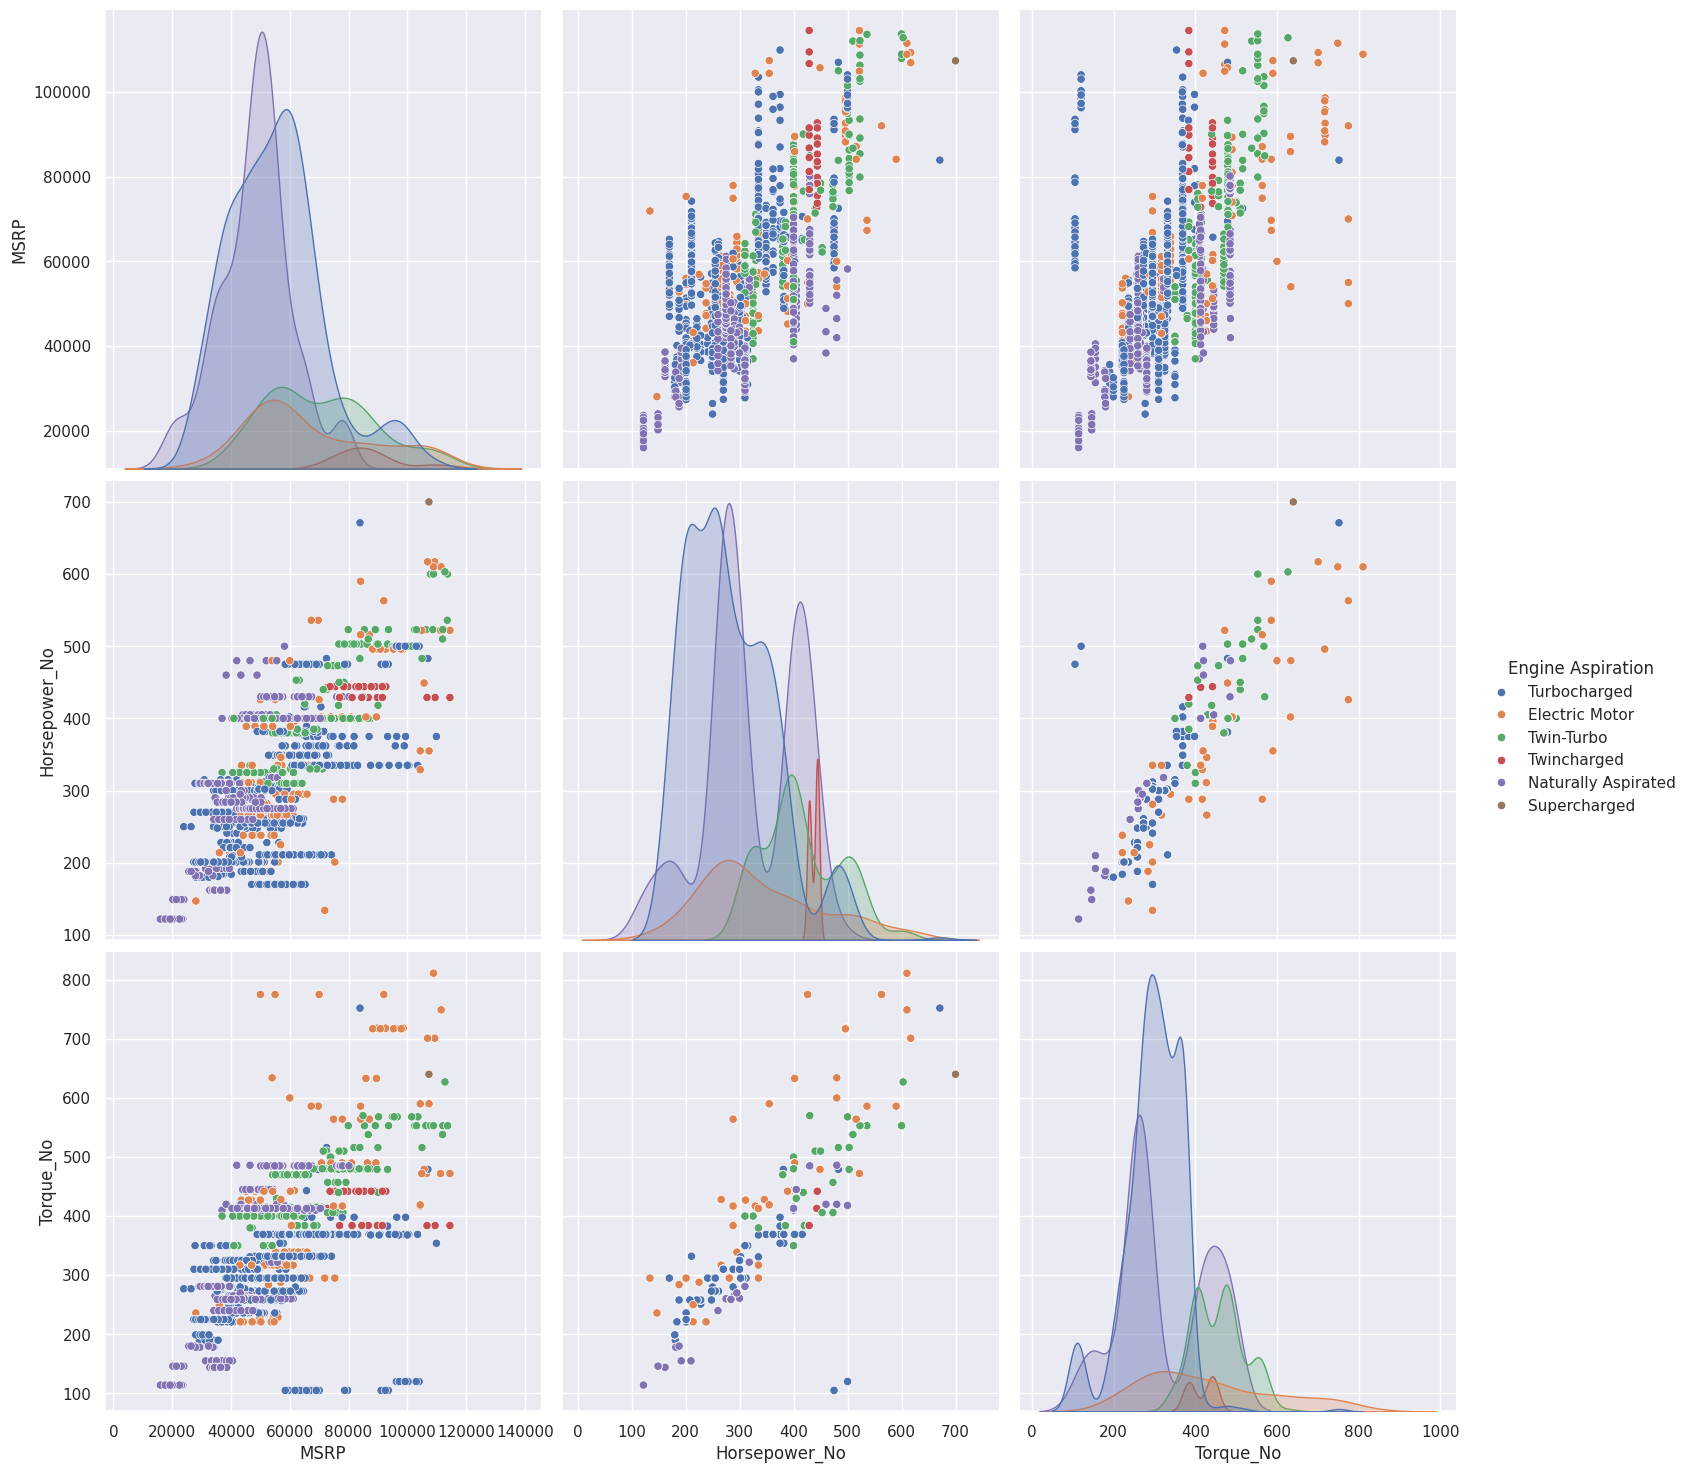

In [15]:
# Pairplot to visualize relationships between numerical features
sns.set(rc={'figure.figsize': (8, 5)})
sns.pairplot(dataset_car[['MSRP', 'Horsepower_No', 'Torque_No', 'Engine Aspiration']], hue='Engine Aspiration', height=5)
plt.show()

<ipython-input-16-af0dba8f2f23>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=column, y="MSRP", data=dataset_car, errorbar=('ci', False), palette='viridis')


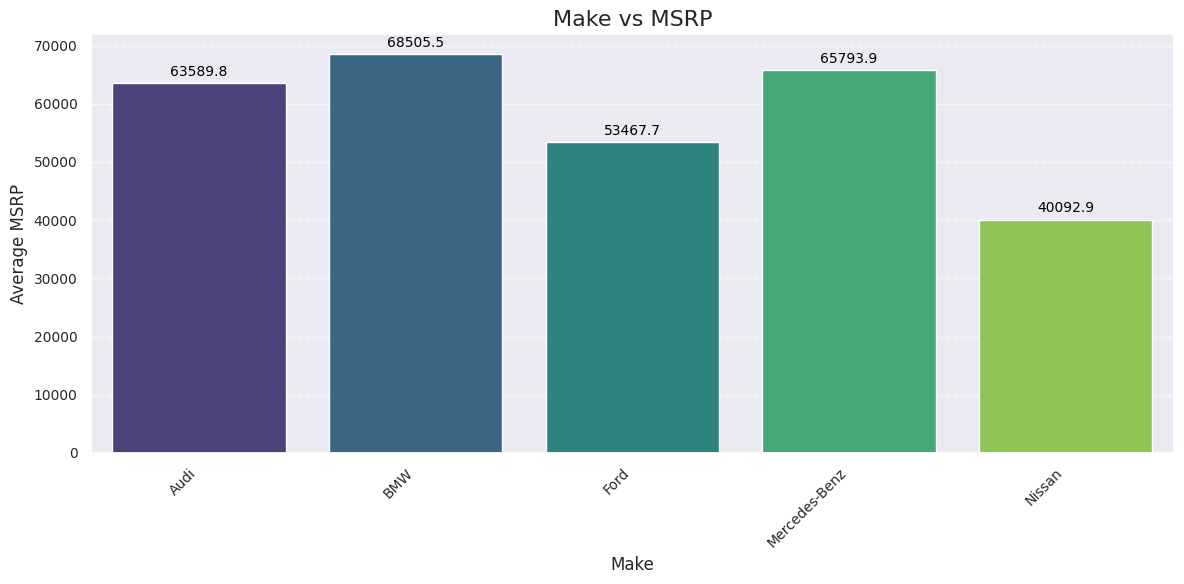

<ipython-input-16-af0dba8f2f23>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=column, y="MSRP", data=dataset_car, errorbar=('ci', False), palette='viridis')


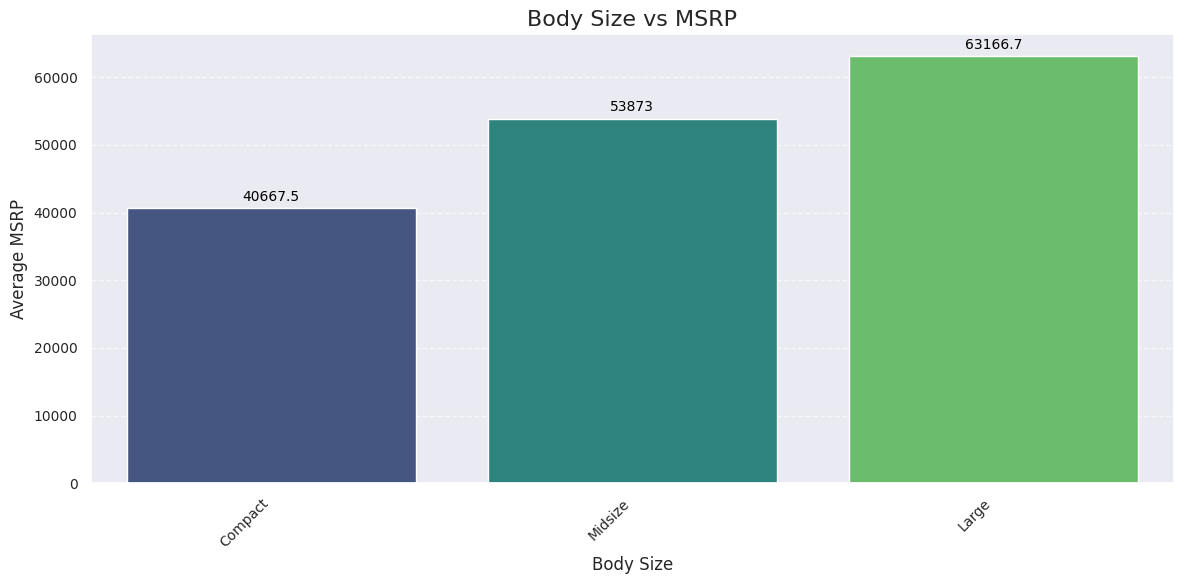

<ipython-input-16-af0dba8f2f23>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=column, y="MSRP", data=dataset_car, errorbar=('ci', False), palette='viridis')


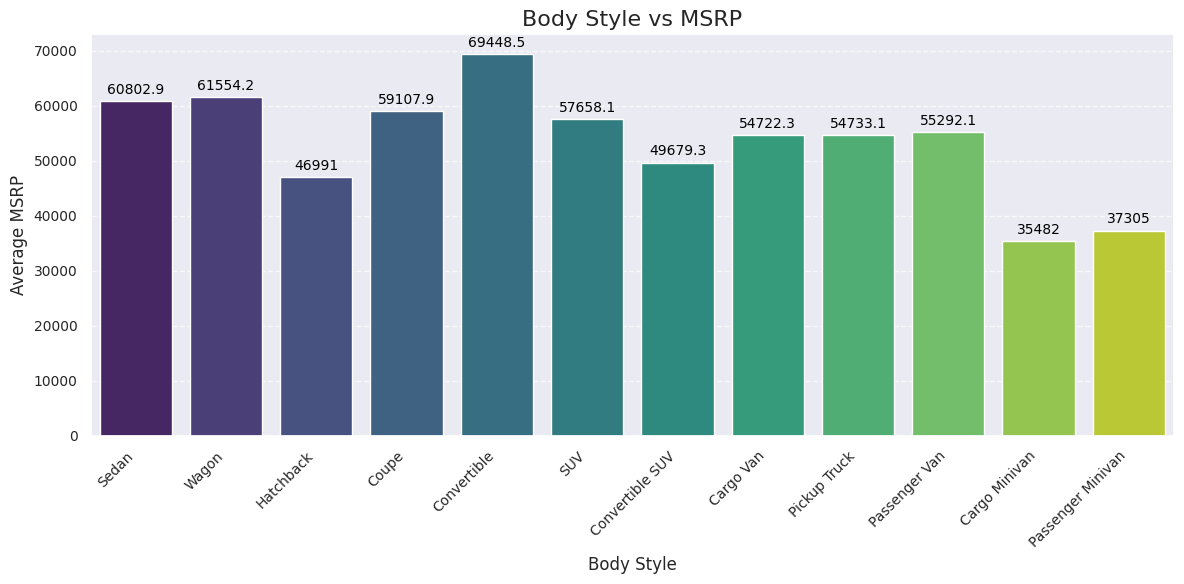

<ipython-input-16-af0dba8f2f23>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=column, y="MSRP", data=dataset_car, errorbar=('ci', False), palette='viridis')


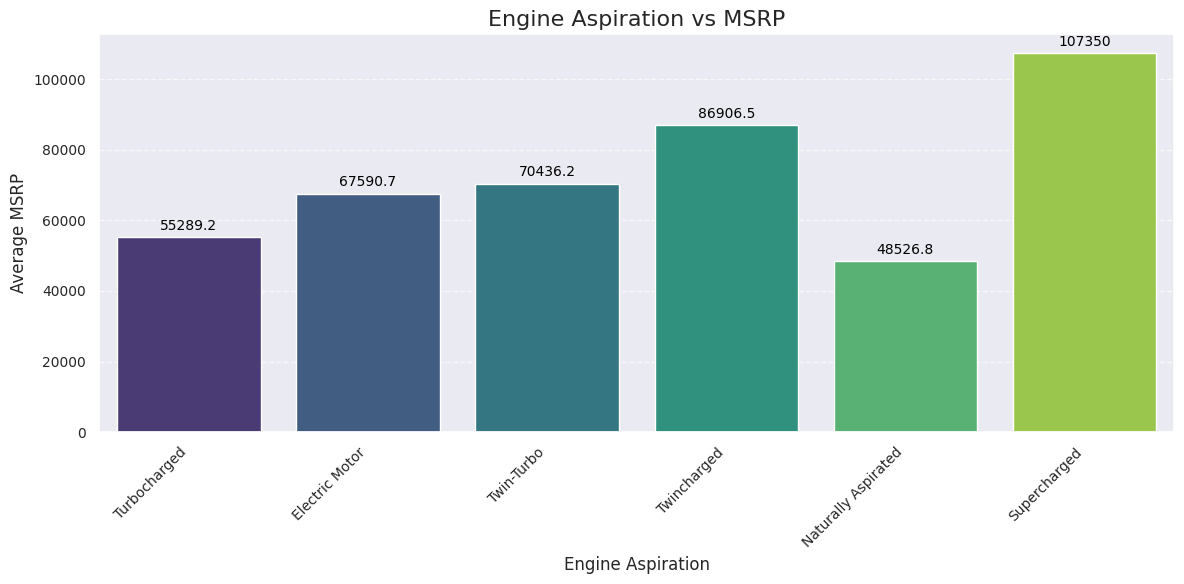

<ipython-input-16-af0dba8f2f23>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=column, y="MSRP", data=dataset_car, errorbar=('ci', False), palette='viridis')


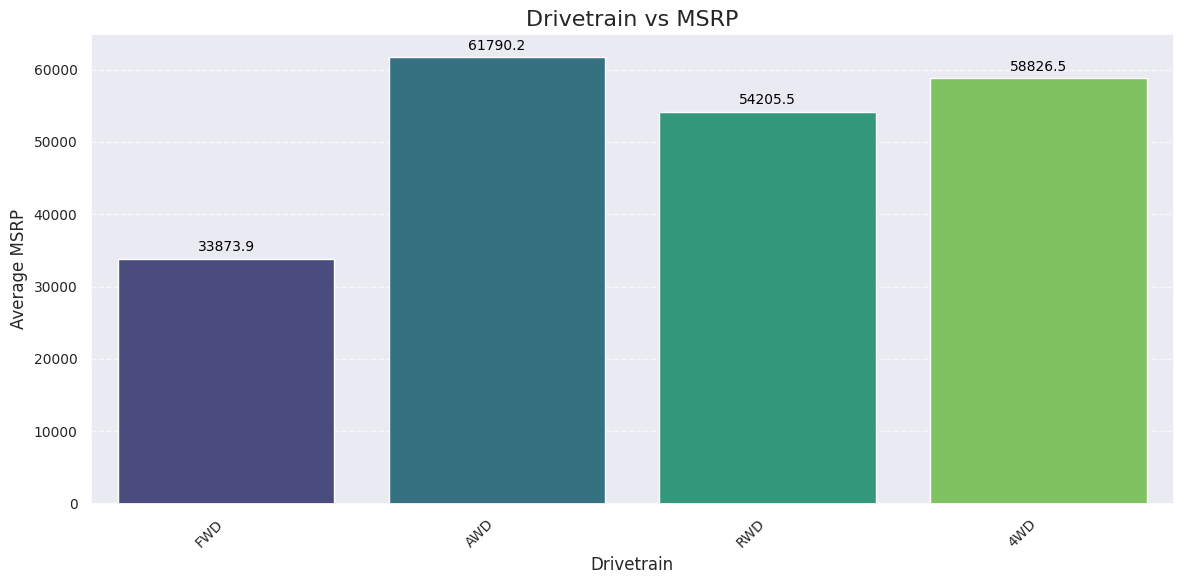

<ipython-input-16-af0dba8f2f23>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=column, y="MSRP", data=dataset_car, errorbar=('ci', False), palette='viridis')


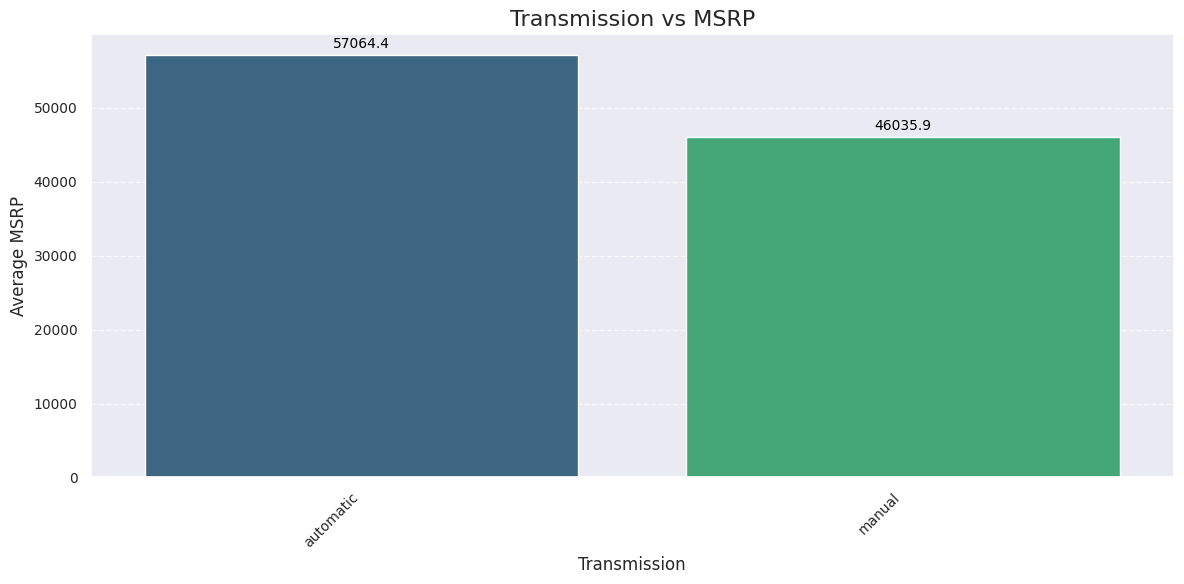

In [16]:
# Bar plots for categorical variables vs MSRP with enhanced visuals
categorical_columns = ['Make', 'Body Size', 'Body Style', 'Engine Aspiration', 'Drivetrain', 'Transmission']
for column in categorical_columns:
    plt.figure(figsize=(12, 6))  # Increased figure size for better visibility
    ax = sns.barplot(x=column, y="MSRP", data=dataset_car, errorbar=('ci', False), palette='viridis')

    # Adding the value labels for each bar
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', color='black', fontsize=10, padding=3)

    # Adding title and improving layout
    plt.title(f'{column} vs MSRP', fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Average MSRP', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels for better readability
    plt.yticks(fontsize=10)  # Make y-axis labels smaller for clarity
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better reference
    plt.tight_layout()  # Adjust layout to prevent overlapping labels
    plt.show()

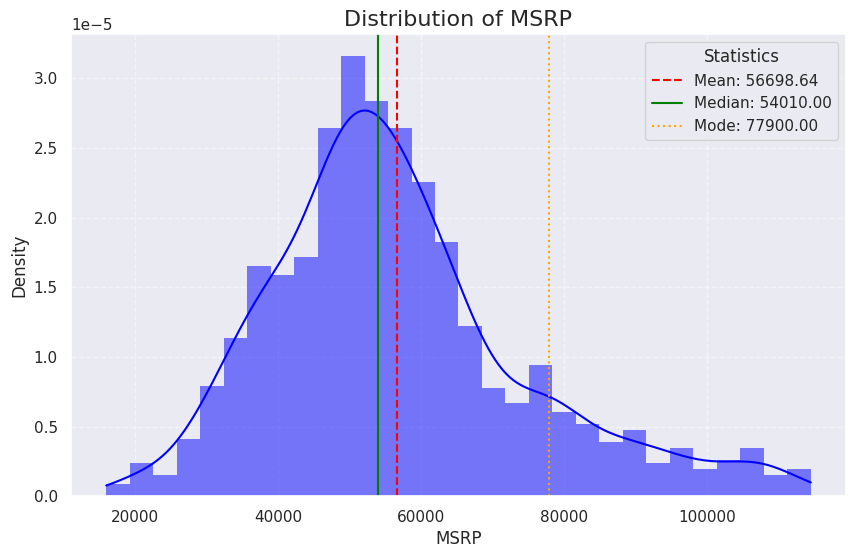

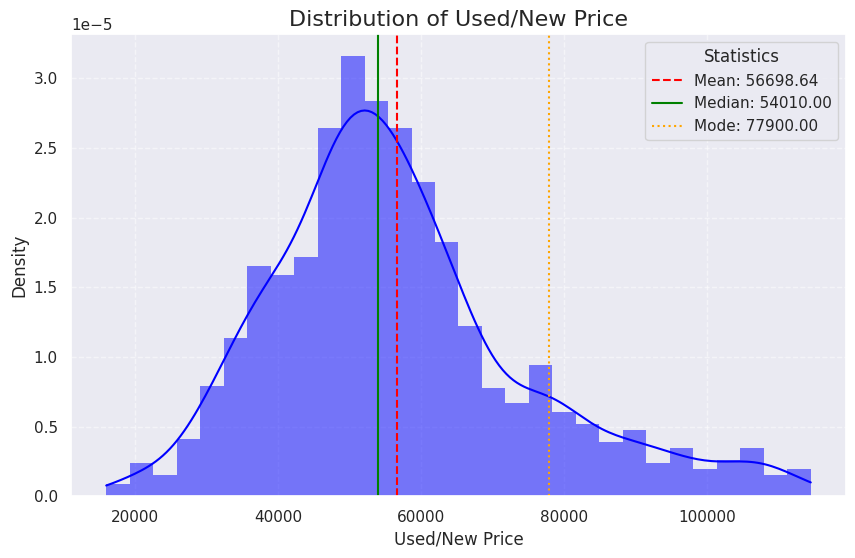

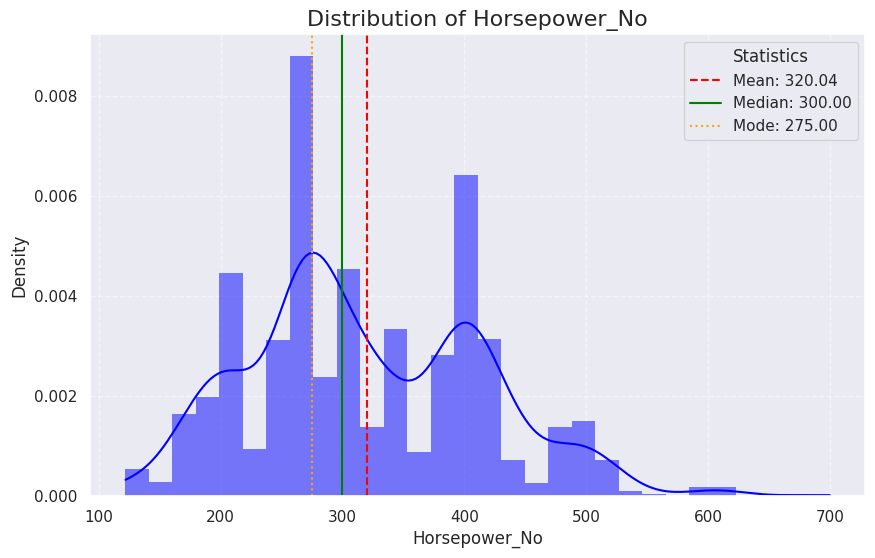

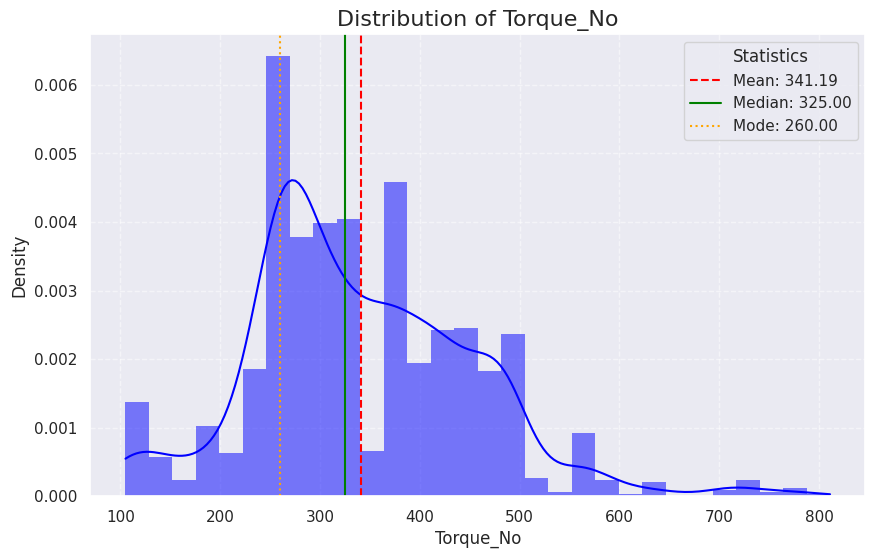

In [17]:
# Distribution plots for numerical variables with additional details
numerical_columns = ['MSRP', 'Used/New Price', 'Horsepower_No', 'Torque_No']
for col in numerical_columns:
    plt.figure(figsize=(10,6))

    # Plot histogram with KDE
    sns.histplot(dataset_car[col], kde=True, color='blue', bins=30, stat='density', linewidth=0)

    # Add vertical lines for mean, median, and mode
    mean_val = dataset_car[col].mean()
    median_val = dataset_car[col].median()
    mode_val = dataset_car[col].mode()[0]

    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')
    plt.axvline(mode_val, color='orange', linestyle=':', label=f'Mode: {mode_val:.2f}')

    # Title and labels
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(title="Statistics")
    plt.grid(True, linestyle='--', alpha=0.5)

    # Show plot
    plt.show()

## 6. Feature Encoding

In [18]:
# Drop unnecessary columns for modeling
processed_data = dataset_car.drop(['index', 'Model', 'Year', 'Trim', 'Used/New Price', 'Horsepower', 'Torque'], axis=1)

In [19]:
# Convert categorical variables into dummy variables (one-hot encoding)
processed_data = pd.get_dummies(processed_data, columns=categorical_columns)

processed_data.head()

,MSRP,Horsepower_No,Torque_No,Make_Audi,Make_BMW,Make_Ford,Make_Mercedes-Benz,Make_Nissan,Body Size_Compact,Body Size_Large,...,Engine Aspiration_Supercharged,Engine Aspiration_Turbocharged,Engine Aspiration_Twin-Turbo,Engine Aspiration_Twincharged,Drivetrain_4WD,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_RWD,Transmission_automatic,Transmission_manual
1,35800.0,201.0,221.0,True,False,False,False,False,True,False,...,False,True,False,False,False,False,True,False,True,False
2,37800.0,201.0,221.0,True,False,False,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False
3,41400.0,201.0,221.0,True,False,False,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False
4,39400.0,201.0,221.0,True,False,False,False,False,True,False,...,False,True,False,False,False,False,True,False,True,False
5,41900.0,201.0,236.0,True,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False


## 7. Correlation Analysis

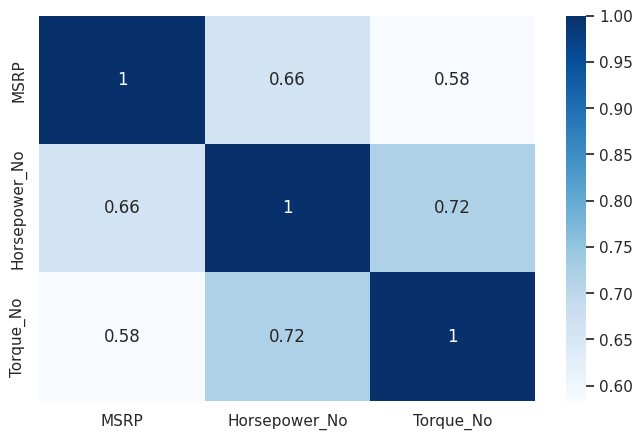

In [20]:
# Calculate and visualize correlation matrix for numerical features
corr_matrix = processed_data[['MSRP', 'Horsepower_No', 'Torque_No']].corr(method='pearson')
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.show()

## 8. Feature Importance using Decision Tree

In [21]:
# Train a decision tree classifier to evaluate feature importance
X = processed_data.drop(['MSRP'], axis=1).values
y = processed_data['MSRP'].astype(int)

dt = DecisionTreeClassifier(random_state=15, criterion='entropy', max_depth=10)
dt.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [22]:
# Display feature importance
feature_importances = pd.DataFrame({
    'Feature': processed_data.drop('MSRP', axis=1).columns,
    'Importance': dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [23]:
# Show feature importance table
print("Feature Importance:")
feature_importances

Feature Importance:


,Feature,Importance
1,Torque_No,0.276009
0,Horsepower_No,0.140579
4,Make_Ford,0.130741
23,Engine Aspiration_Naturally Aspirated,0.059587
31,Drivetrain_RWD,0.055515
25,Engine Aspiration_Turbocharged,0.049826
9,Body Size_Midsize,0.036429
19,Body Style_SUV,0.032565
29,Drivetrain_AWD,0.030125
11,Body Style_Cargo Van,0.030048


## 9. Model Training & Evaluation (Linear Regression)

In [24]:
# Split the data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=15)

In [25]:
# Initialize and train the linear regression model
lm = LinearRegression(fit_intercept=True)
lm.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predictions for training and testing data
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

In [27]:
# Model performance evaluation (Training & Testing)
print(f'Accuracy on training set: {lm.score(X_train, y_train)}')
print(f'R² on training set: {r2_score(y_train, y_pred_train)}')
print(f'RMSE on training set: {sqrt(mean_squared_error(y_train, y_pred_train))}')
print(f'MAE on training set: {mean_absolute_error(y_train, y_pred_train)}')

print(f'Accuracy on testing set: {lm.score(X_test, y_test)}')
print(f'R² on testing set: {r2_score(y_test, y_pred_test)}')
print(f'RMSE on testing set: {sqrt(mean_squared_error(y_test, y_pred_test))}')
print(f'MAE on testing set: {mean_absolute_error(y_test, y_pred_test)}')

Accuracy on training set: 0.7980638206314188
R² on training set: 0.7980638206314188
RMSE on training set: 8217.015063430901
MAE on training set: 6189.500168709111
Accuracy on testing set: 0.7947650473744045
R² on testing set: 0.7947650473744045
RMSE on testing set: 7869.851450649537
MAE on testing set: 5975.462145468931


## 10. Model Evaluation Visualizations

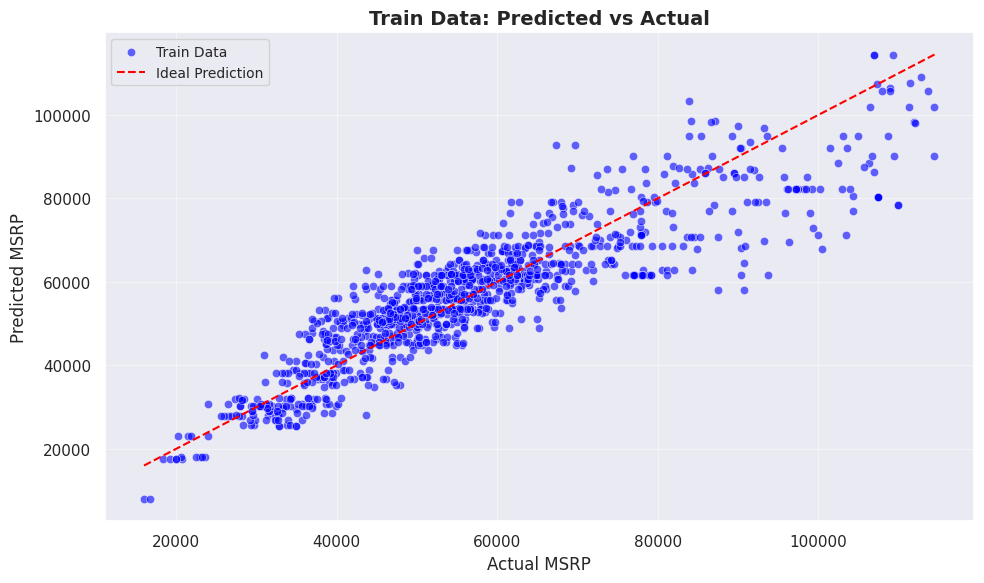

In [28]:
# 1. Predicted vs Actual (Train)
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(y_train, y_pred_train, color='blue', label='Train Data', alpha=0.6, edgecolors="w", linewidth=0.5)

# Add a red dashed line for ideal prediction
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Ideal Prediction')

# Add title and labels
plt.title('Train Data: Predicted vs Actual', fontsize=14, fontweight='bold')
plt.xlabel('Actual MSRP', fontsize=12)
plt.ylabel('Predicted MSRP', fontsize=12)

# Add a legend
plt.legend(loc='upper left', fontsize=10)

# Enhance gridlines for better readability
plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

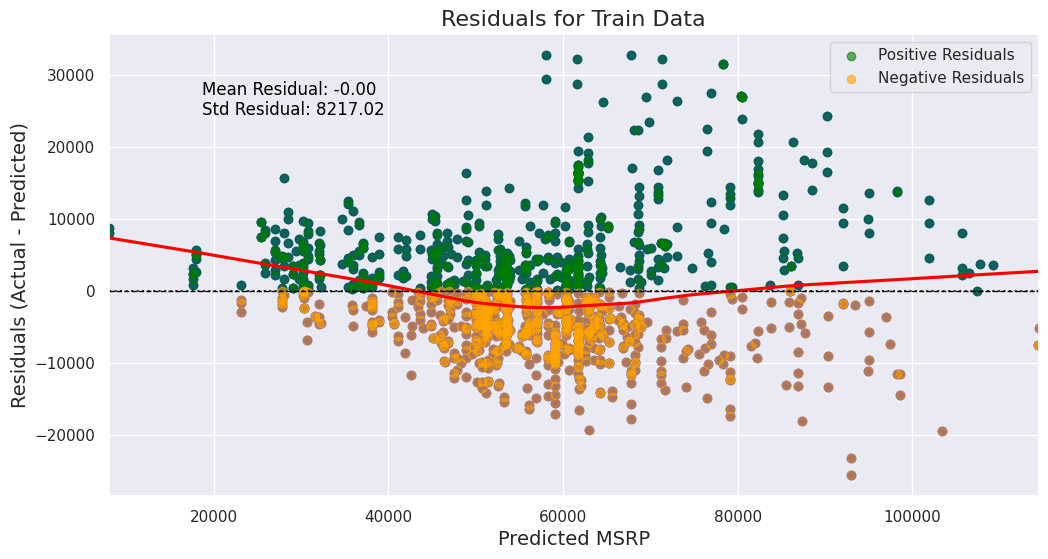

In [29]:
# 2. Residuals (Train) - Improved
plt.figure(figsize=(12, 6))

# Residual plot with different colors for positive and negative residuals
residuals = y_train - y_pred_train
sns.residplot(x=y_pred_train, y=residuals, lowess=True, color='blue', line_kws={'color': 'red'})

# Adding a horizontal line at 0 for reference
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Highlighting positive and negative residuals
plt.scatter(y_pred_train[residuals > 0], residuals[residuals > 0], color='green', label='Positive Residuals', alpha=0.6)
plt.scatter(y_pred_train[residuals < 0], residuals[residuals < 0], color='orange', label='Negative Residuals', alpha=0.6)

# Adding title, labels, and grid for better readability
plt.title('Residuals for Train Data', fontsize=16)
plt.xlabel('Predicted MSRP', fontsize=14)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=14)

# Adding a legend for better understanding
plt.legend()

# Adding statistical information on the plot
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)
plt.text(0.1, 0.9, f'Mean Residual: {mean_residual:.2f}\nStd Residual: {std_residual:.2f}',
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', color='black')

# Adding grid for better readability
plt.grid(True)

# Display plot
plt.show()

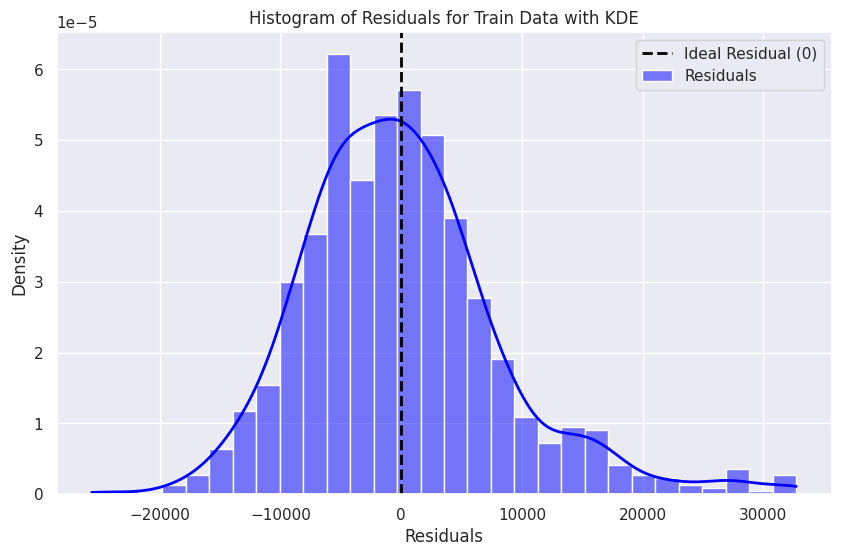

In [30]:
# 3. Histogram of Residuals (Train) with more informative visualization
plt.figure(figsize=(10, 6))

# Calculate residuals
residuals_train = y_train - y_pred_train

# Plotting histogram with KDE
sns.histplot(residuals_train, kde=True, color='blue', bins=30, stat="density", label="Residuals", line_kws={'color': 'red', 'linewidth': 2})

# Add a vertical line at zero (ideal residual point)
plt.axvline(0, color='black', linestyle='--', label="Ideal Residual (0)", linewidth=2)

# Add grid and labels
plt.title('Histogram of Residuals for Train Data with KDE')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

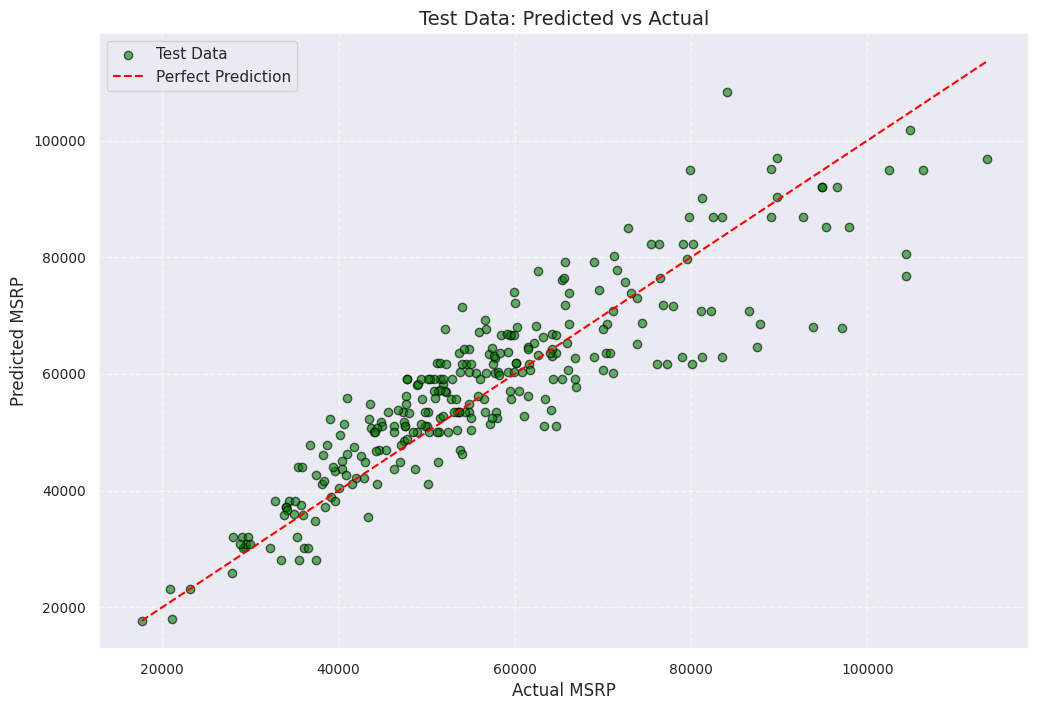

In [31]:
# 4. Predicted vs Actual (Test)
plt.figure(figsize=(12, 8))

# Scatter plot with more informative styling
plt.scatter(y_test, y_pred_test, color='green', alpha=0.6, label='Test Data', edgecolor='black')

# Add a line showing perfect prediction (y = x line)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Add a title and labels
plt.title('Test Data: Predicted vs Actual', fontsize=14)
plt.xlabel('Actual MSRP', fontsize=12)
plt.ylabel('Predicted MSRP', fontsize=12)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Customize ticks for better readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

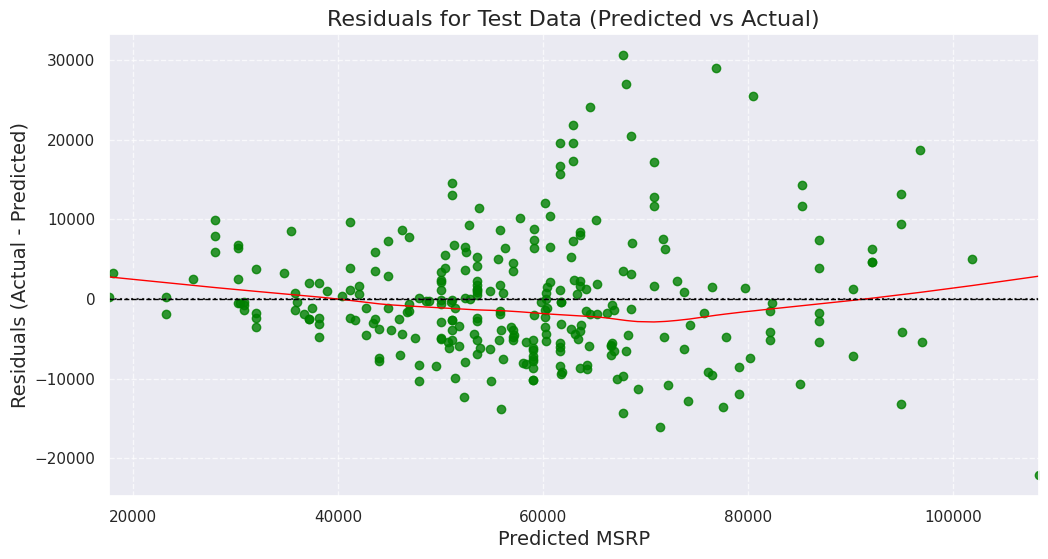

In [32]:
# 5. Residuals (Test) - Enhanced with improved readability
plt.figure(figsize=(12, 6))
sns.residplot(x=y_pred_test, y=y_test - y_pred_test, lowess=True, color='green', line_kws={'color': 'red', 'lw': 1})

# Add a horizontal line at y=0 to highlight the zero residual line
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Add labels and a title for clarity
plt.title('Residuals for Test Data (Predicted vs Actual)', fontsize=16)
plt.xlabel('Predicted MSRP', fontsize=14)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=14)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

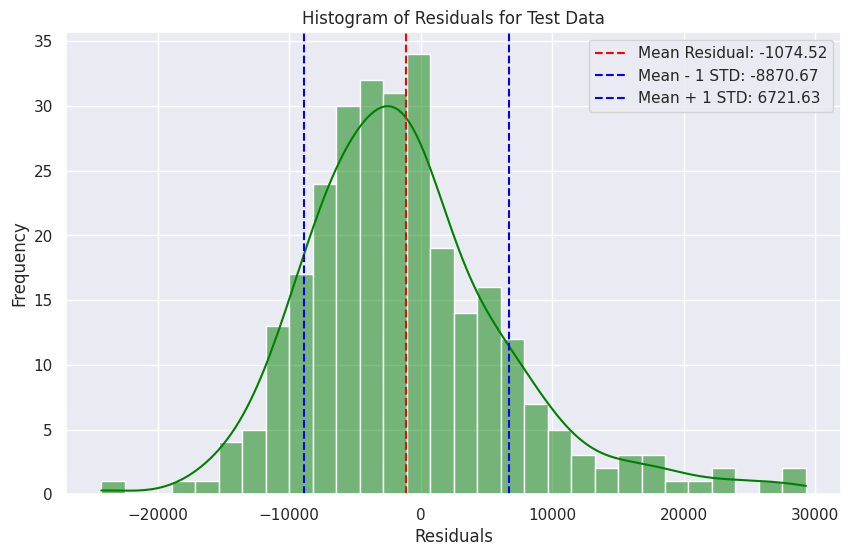

In [33]:
# 6. Histogram of Residuals (Test)
plt.figure(figsize=(10, 6))

# Plot histogram with kde
sns.histplot(y_test - y_pred_test, kde=True, color='green', bins=30)

# Add vertical line for mean of residuals
mean_residual = np.mean(y_test - y_pred_test)
plt.axvline(mean_residual, color='red', linestyle='--', label=f'Mean Residual: {mean_residual:.2f}')

# Add vertical lines for standard deviation
std_residual = np.std(y_test - y_pred_test)
plt.axvline(mean_residual - std_residual, color='blue', linestyle='--', label=f'Mean - 1 STD: {mean_residual - std_residual:.2f}')
plt.axvline(mean_residual + std_residual, color='blue', linestyle='--', label=f'Mean + 1 STD: {mean_residual + std_residual:.2f}')

# Title and labels
plt.title('Histogram of Residuals for Test Data')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Show grid for better readability
plt.grid(True)

# Display legend
plt.legend()

# Show plot
plt.show()

# Answer the question

### 11. Model Saving and Export

In [34]:
# Save the trained model to a pickle file
with open('linear_model.pkl', 'wb') as f:
    pickle.dump(lm, f)

In [35]:
# Save feature importance results to Excel
feature_importances = pd.DataFrame(lm.coef_, index=processed_data.drop('MSRP', axis=1).columns, columns=['Importance'])
feature_importances.to_excel("feature_importance.xlsx", index=True)

In [36]:
# Add predictions to dataset and save the dataset with predictions to Excel
dataset_car['MSRP Predictions'] = lm.predict(X)
dataset_car.to_excel("data_with_predictions.xlsx", index=False)

### 1. Faktor Apa yang Paling Mempengaruhi Harga Kendaraan Baru (MSRP)?

Faktor yang paling mempengaruhi harga kendaraan baru (MSRP) adalah Torque_No dan Horsepower_No, dengan kontribusi masing-masing sebesar 27.60% dan 14.06%. Selain itu, merek Ford dan tipe Engine Aspiration seperti Turbocharged juga memiliki pengaruh signifikan terhadap harga kendaraan.

In [37]:
# Display feature importance
feature_importances = pd.DataFrame({
    'Feature': processed_data.drop('MSRP', axis=1).columns,
    'Importance': dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Show feature importance table
print("Feature Importance:")
feature_importances

Feature Importance:


,Feature,Importance
1,Torque_No,0.276009
0,Horsepower_No,0.140579
4,Make_Ford,0.130741
23,Engine Aspiration_Naturally Aspirated,0.059587
31,Drivetrain_RWD,0.055515
25,Engine Aspiration_Turbocharged,0.049826
9,Body Size_Midsize,0.036429
19,Body Style_SUV,0.032565
29,Drivetrain_AWD,0.030125
11,Body Style_Cargo Van,0.030048


### 2. Bagaimana Hubungan Antara Jenis Kendaraan dan Harga (MSRP)?

Harga kendaraan baru (MSRP) bervariasi berdasarkan kategori. Dalam data yang tersedia, merek dengan harga rata-rata tertinggi adalah BMW (Rp68.505.000), diikuti oleh Mercedes-Benz (Rp65.793.000) dan Audi (Rp63.589.800).

Untuk tipe bodi, kendaraan dengan tipe bodi Large memiliki harga rata-rata tertinggi (Rp63.166.700), sedangkan tipe bodi Compact memiliki harga rata-rata terendah (Rp40.667.500).

Selain itu, kendaraan dengan sistem drivetrain AWD memiliki harga rata-rata yang lebih tinggi (Rp61.790.200) dibandingkan dengan FWD (Rp33.873.900) dan RWD (Rp54.205.500). Dalam hal aspirasi mesin, kendaraan dengan mesin Twin-Turbo memiliki harga rata-rata tertinggi (Rp70.436.200), yang menunjukkan bahwa spesifikasi premium seperti ini memengaruhi harga secara signifikan.

<ipython-input-38-af0dba8f2f23>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=column, y="MSRP", data=dataset_car, errorbar=('ci', False), palette='viridis')


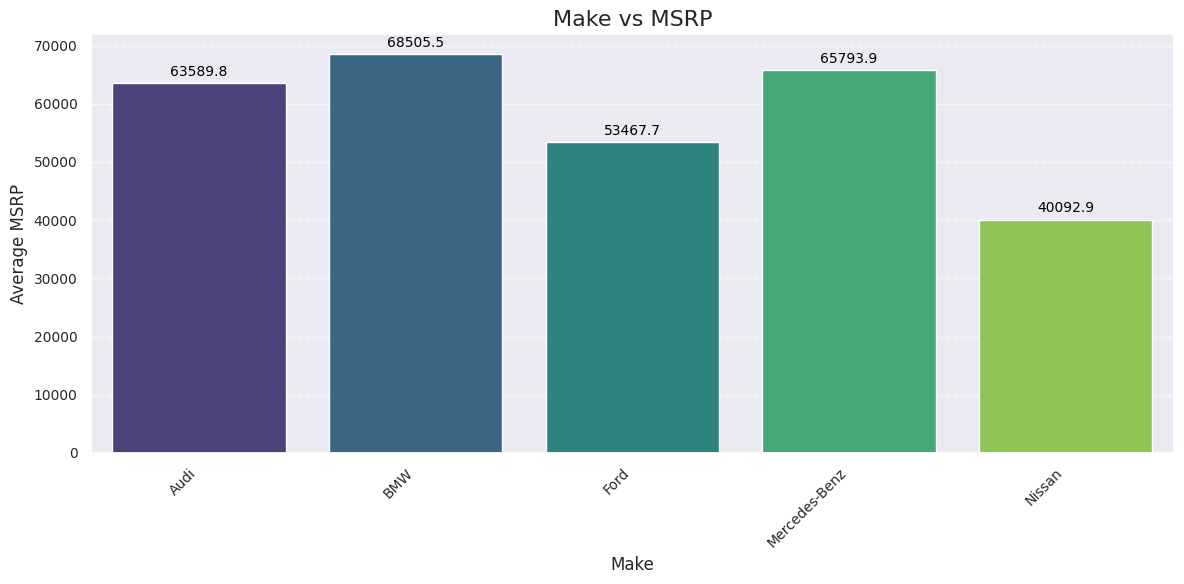

<ipython-input-38-af0dba8f2f23>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=column, y="MSRP", data=dataset_car, errorbar=('ci', False), palette='viridis')


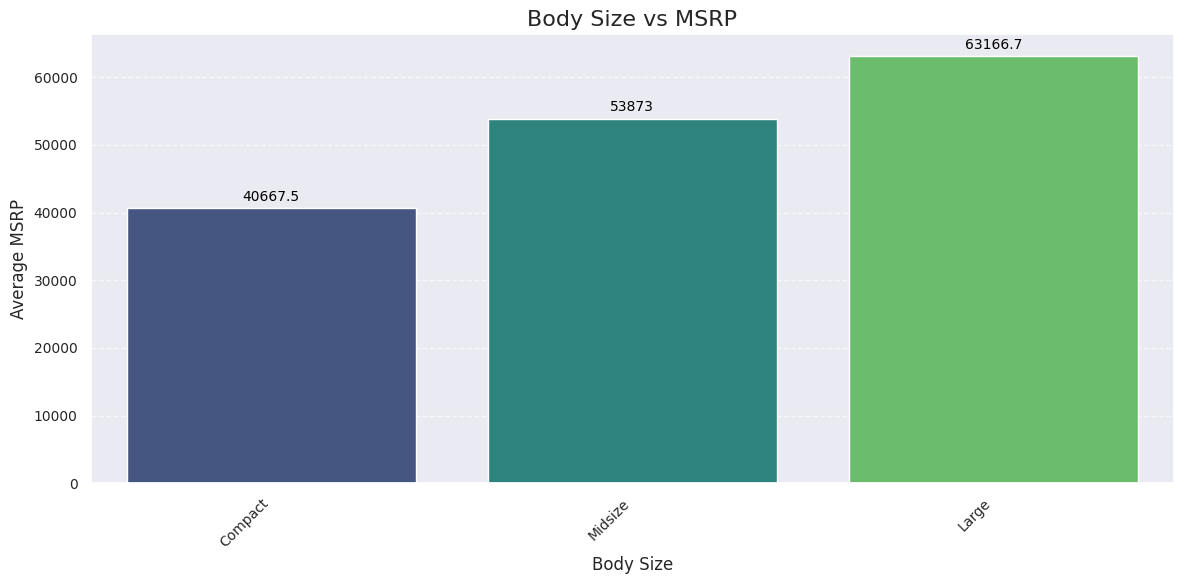

<ipython-input-38-af0dba8f2f23>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=column, y="MSRP", data=dataset_car, errorbar=('ci', False), palette='viridis')


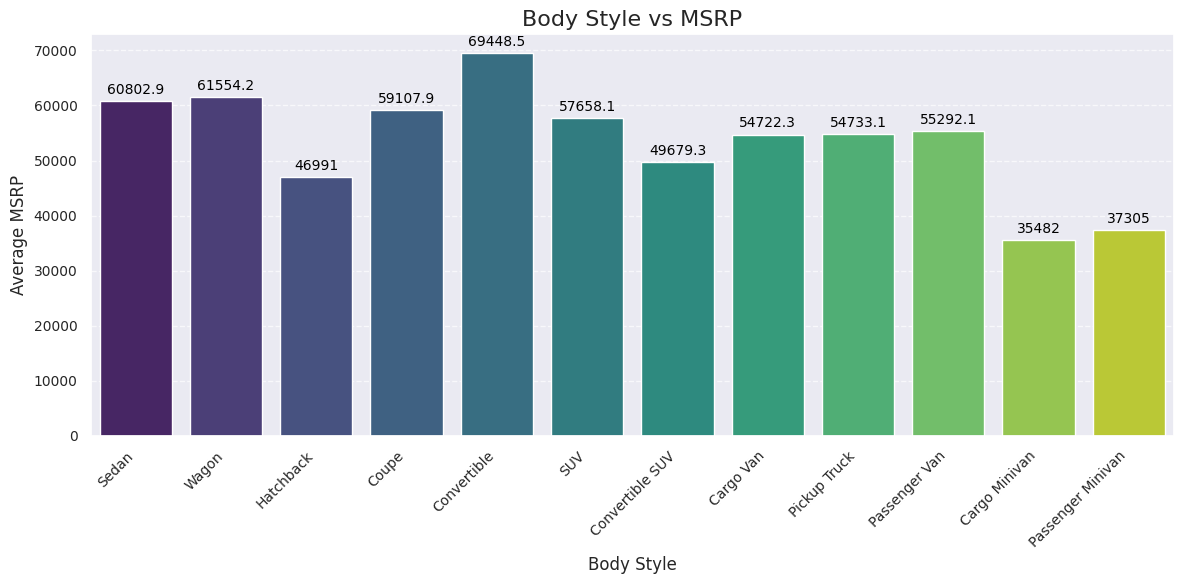

<ipython-input-38-af0dba8f2f23>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=column, y="MSRP", data=dataset_car, errorbar=('ci', False), palette='viridis')


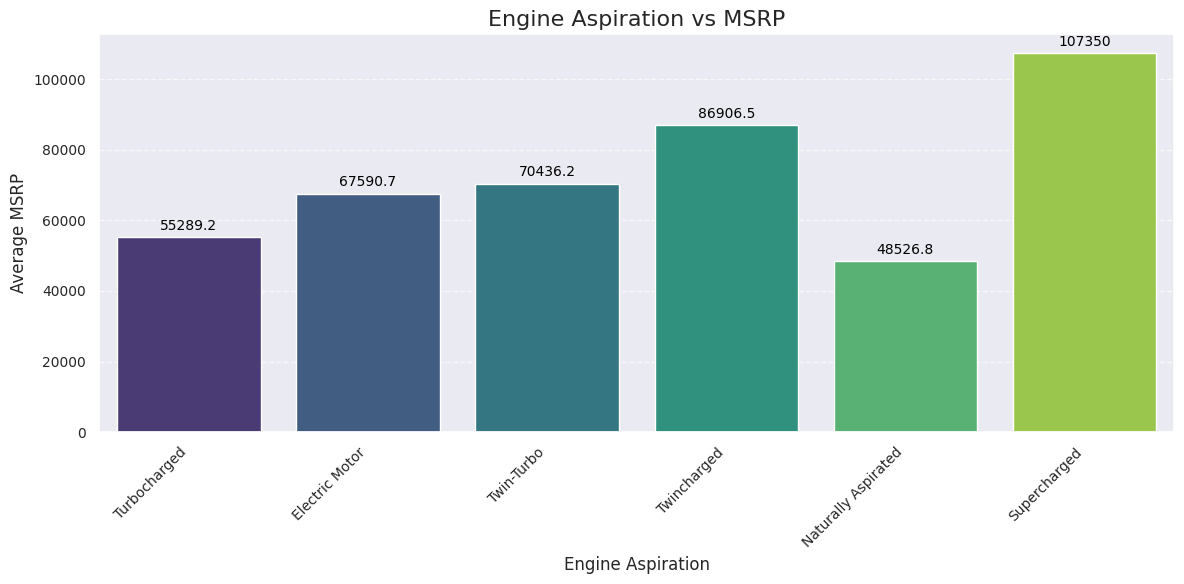

<ipython-input-38-af0dba8f2f23>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=column, y="MSRP", data=dataset_car, errorbar=('ci', False), palette='viridis')


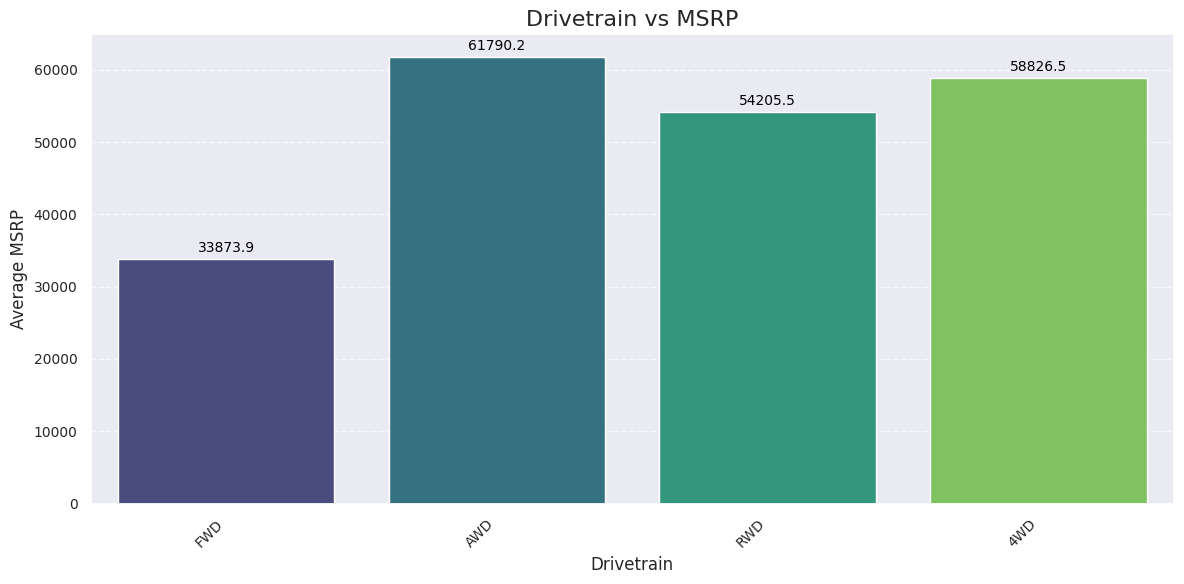

<ipython-input-38-af0dba8f2f23>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=column, y="MSRP", data=dataset_car, errorbar=('ci', False), palette='viridis')


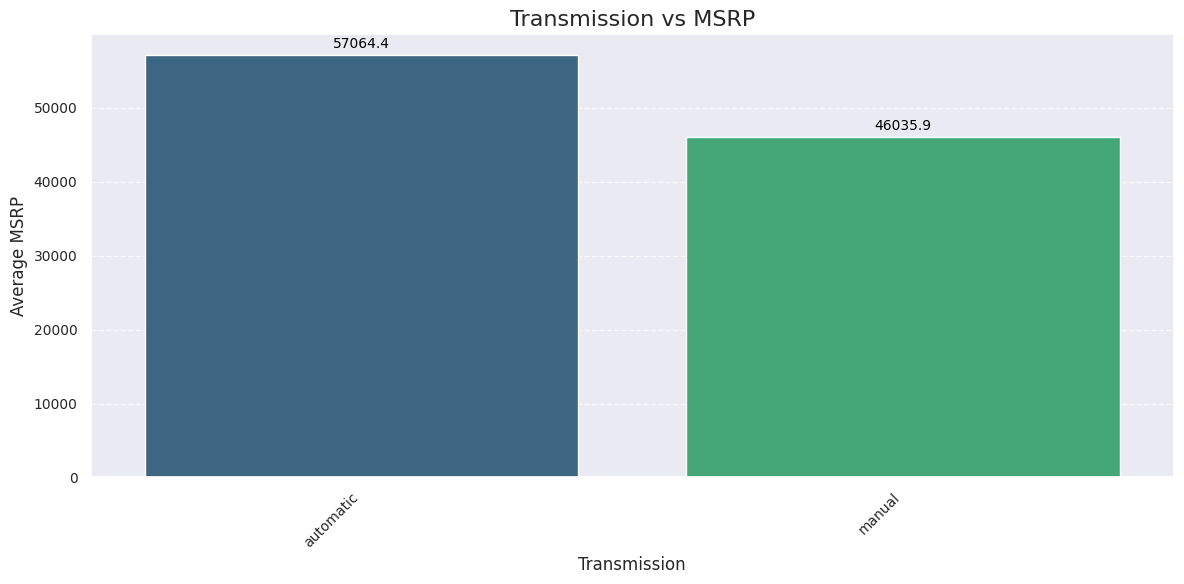

In [38]:
# Bar plots for categorical variables vs MSRP with enhanced visuals
categorical_columns = ['Make', 'Body Size', 'Body Style', 'Engine Aspiration', 'Drivetrain', 'Transmission']
for column in categorical_columns:
    plt.figure(figsize=(12, 6))  # Increased figure size for better visibility
    ax = sns.barplot(x=column, y="MSRP", data=dataset_car, errorbar=('ci', False), palette='viridis')

    # Adding the value labels for each bar
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', color='black', fontsize=10, padding=3)

    # Adding title and improving layout
    plt.title(f'{column} vs MSRP', fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Average MSRP', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels for better readability
    plt.yticks(fontsize=10)  # Make y-axis labels smaller for clarity
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better reference
    plt.tight_layout()  # Adjust layout to prevent overlapping labels
    plt.show()

### 3. Bagaimana Distribusi Harga Kendaraan Berpengaruh pada Strategi Harga?

Berdasarkan grafik, distribusi MSRP menunjukkan konsentrasi harga dengan rata-rata sekitar $56,698.64 dan median $54,010.00, yang dapat membantu produsen menentukan titik harga yang optimal untuk menarik konsumen. Selain itu, perbandingan antara harga baru dan harga bekas, yang juga memiliki rata-rata $56,698.64 dan median $54,010.00, menunjukkan bahwa ada keselarasan dalam penetapan harga yang dapat mempengaruhi strategi harga. Hal ini menunjukkan potensi penyesuaian harga yang diperlukan untuk bersaing di pasar yang berbeda, terutama dengan mempertimbangkan mode harga yang tercatat sebesar $77,900.00 untuk kedua kategori tersebut.


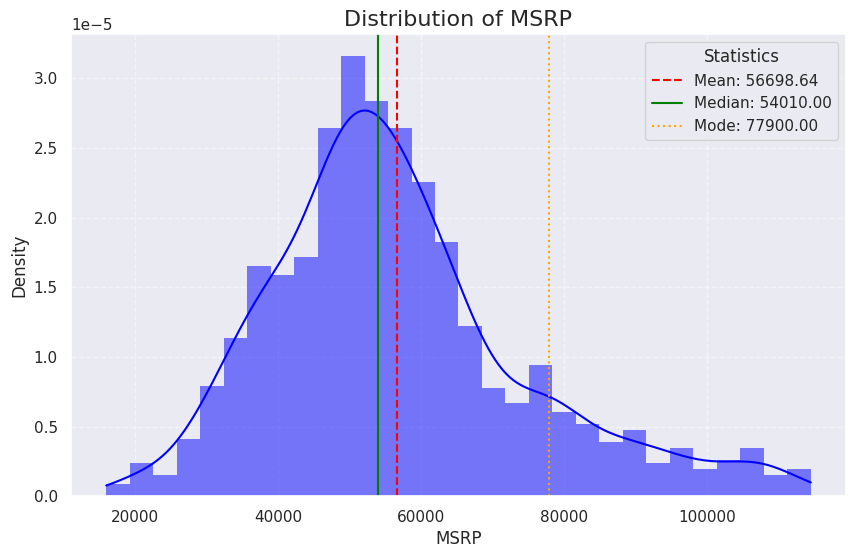

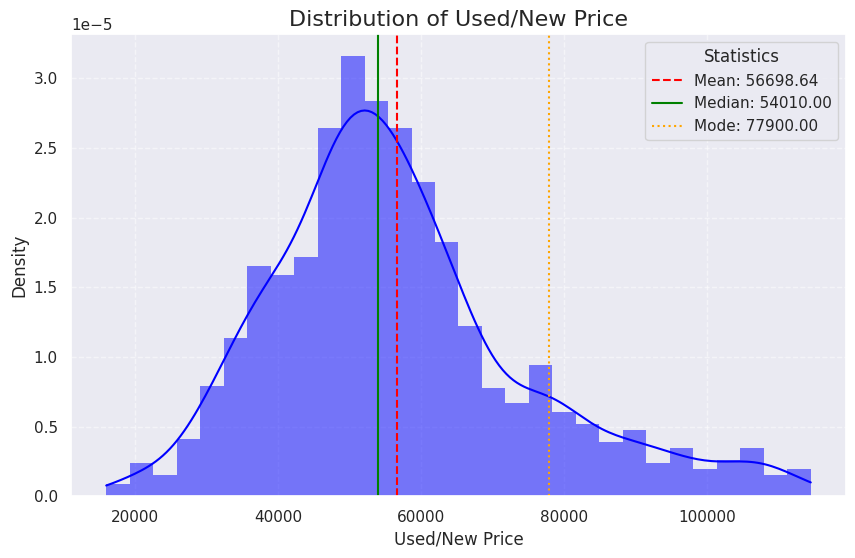

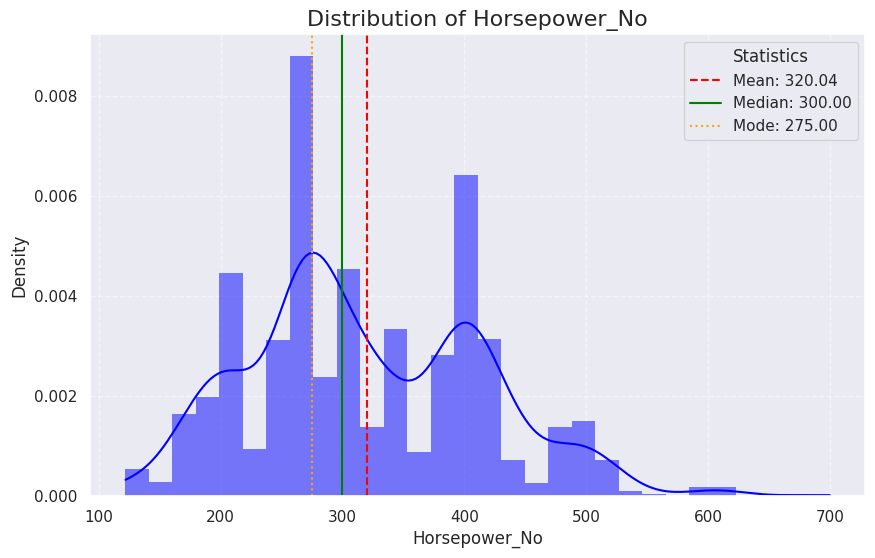

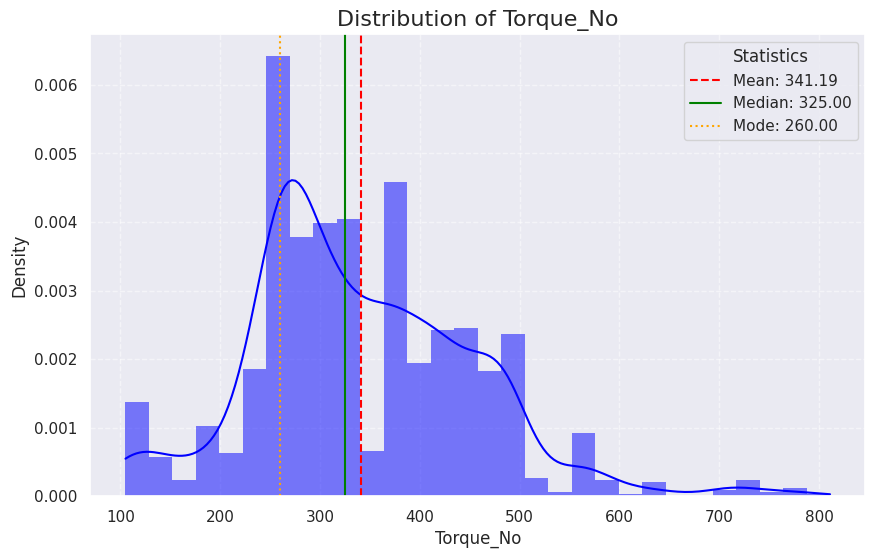

In [39]:
# Distribution plots for numerical variables with additional details
numerical_columns = ['MSRP', 'Used/New Price', 'Horsepower_No', 'Torque_No']
for col in numerical_columns:
    plt.figure(figsize=(10,6))

    # Plot histogram with KDE
    sns.histplot(dataset_car[col], kde=True, color='blue', bins=30, stat='density', linewidth=0)

    # Add vertical lines for mean, median, and mode
    mean_val = dataset_car[col].mean()
    median_val = dataset_car[col].median()
    mode_val = dataset_car[col].mode()[0]

    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')
    plt.axvline(mode_val, color='orange', linestyle=':', label=f'Mode: {mode_val:.2f}')

    # Title and labels
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(title="Statistics")
    plt.grid(True, linestyle='--', alpha=0.5)

    # Show plot
    plt.show()

### 4. Bagaimana Kinerja Prediksi Model Dibandingkan dengan Data Aktual?

Kinerja model prediksi menunjukkan akurasi yang baik, dengan R² mencapai 0.798 pada data pelatihan dan 0.795 pada data pengujian, yang menunjukkan prediksi yang cukup akurat. Namun, meskipun model mendekati harga aktual, nilai RMSE dan MAE yang cukup tinggi menunjukkan adanya kesalahan prediksi pada beberapa kasus, yang menandakan adanya ruang untuk perbaikan lebih lanjut.

In [40]:
# Model performance evaluation (Training & Testing)
print(f'Accuracy on training set: {lm.score(X_train, y_train)}')
print(f'R² on training set: {r2_score(y_train, y_pred_train)}')
print(f'RMSE on training set: {sqrt(mean_squared_error(y_train, y_pred_train))}')
print(f'MAE on training set: {mean_absolute_error(y_train, y_pred_train)}')

print(f'Accuracy on testing set: {lm.score(X_test, y_test)}')
print(f'R² on testing set: {r2_score(y_test, y_pred_test)}')
print(f'RMSE on testing set: {sqrt(mean_squared_error(y_test, y_pred_test))}')
print(f'MAE on testing set: {mean_absolute_error(y_test, y_pred_test)}')

Accuracy on training set: 0.7980638206314188
R² on training set: 0.7980638206314188
RMSE on training set: 8217.015063430901
MAE on training set: 6189.500168709111
Accuracy on testing set: 0.7947650473744045
R² on testing set: 0.7947650473744045
RMSE on testing set: 7869.851450649537
MAE on testing set: 5975.462145468931


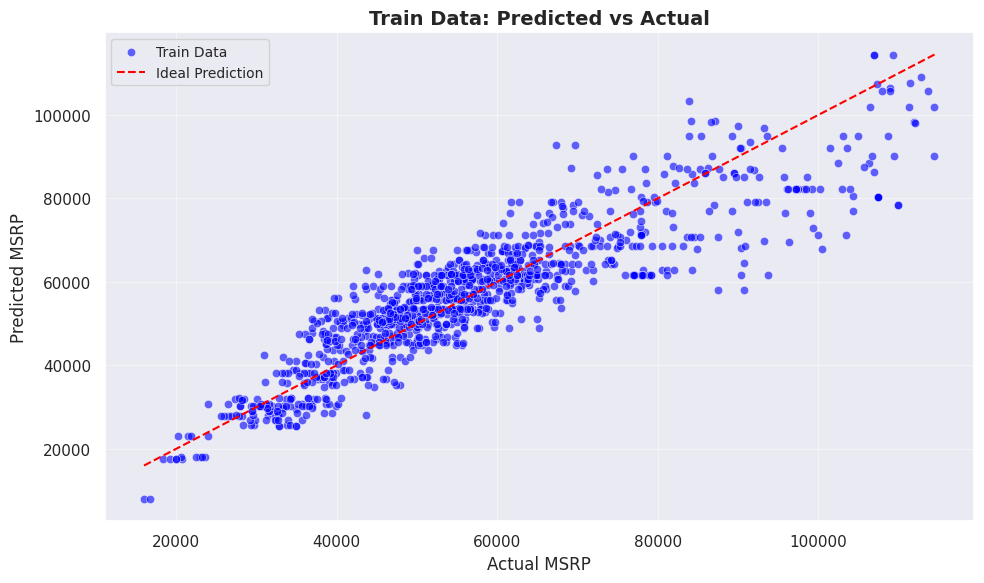

In [41]:
# 1. Predicted vs Actual (Train)
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(y_train, y_pred_train, color='blue', label='Train Data', alpha=0.6, edgecolors="w", linewidth=0.5)

# Add a red dashed line for ideal prediction
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Ideal Prediction')

# Add title and labels
plt.title('Train Data: Predicted vs Actual', fontsize=14, fontweight='bold')
plt.xlabel('Actual MSRP', fontsize=12)
plt.ylabel('Predicted MSRP', fontsize=12)

# Add a legend
plt.legend(loc='upper left', fontsize=10)

# Enhance gridlines for better readability
plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

### 5. Bagaimana Tren Residual Memberikan Wawasan Tentang Kelompok yang Kurang Terlayani?

Tren residual menunjukkan bahwa model cenderung meremehkan harga mobil pada kisaran harga tinggi dan meremehkan harga mobil pada kisaran harga rendah, mengindikasikan adanya kelompok mobil mahal dan murah yang kurang terlayani. Pola non-linear ini menunjukkan bahwa model belum sepenuhnya menangkap kompleksitas hubungan antara fitur mobil dengan harga jualnya, terutama pada mobil mahal dan murah, yang bisa menjadi area perbaikan di masa depan.

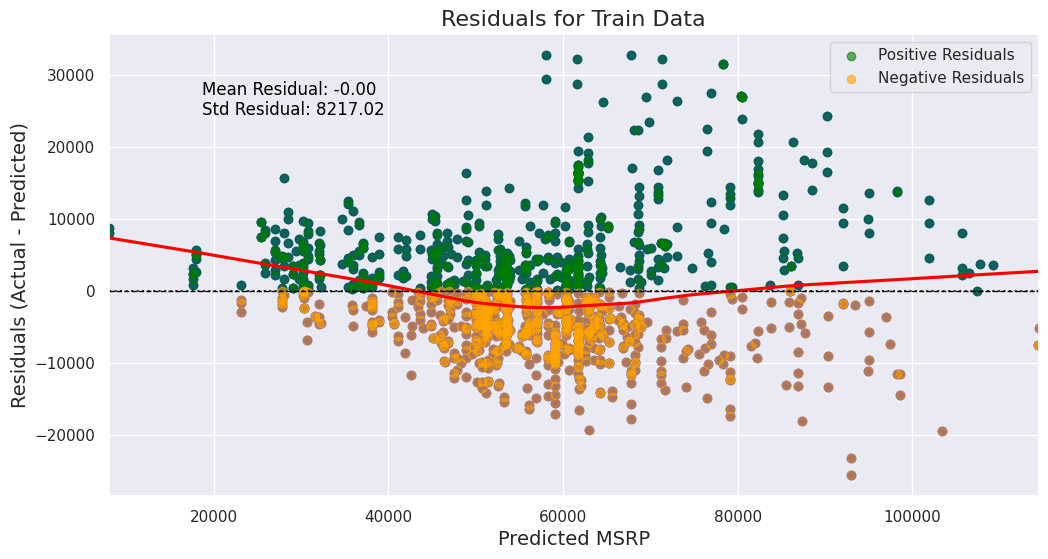

In [42]:
# 2. Residuals (Train) - Improved
plt.figure(figsize=(12, 6))

# Residual plot with different colors for positive and negative residuals
residuals = y_train - y_pred_train
sns.residplot(x=y_pred_train, y=residuals, lowess=True, color='blue', line_kws={'color': 'red'})

# Adding a horizontal line at 0 for reference
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Highlighting positive and negative residuals
plt.scatter(y_pred_train[residuals > 0], residuals[residuals > 0], color='green', label='Positive Residuals', alpha=0.6)
plt.scatter(y_pred_train[residuals < 0], residuals[residuals < 0], color='orange', label='Negative Residuals', alpha=0.6)

# Adding title, labels, and grid for better readability
plt.title('Residuals for Train Data', fontsize=16)
plt.xlabel('Predicted MSRP', fontsize=14)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=14)

# Adding a legend for better understanding
plt.legend()

# Adding statistical information on the plot
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)
plt.text(0.1, 0.9, f'Mean Residual: {mean_residual:.2f}\nStd Residual: {std_residual:.2f}',
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', color='black')

# Adding grid for better readability
plt.grid(True)

# Display plot
plt.show()